## Table of Contents

1. [Introduction](#Introduction)
2. [Required libraries](#Required-libraries)
3. [Problem Statement](#Problem-Statement)
4. [Data Loading and Description](#data-loading)
5. [Data Profiling](#data-profiling)
    - 5.1 [Understanding the Dataset](#data-understanding)
    - 5.2 [Pre Profiling](#data-preprofiling)
    - 5.3 [Processing](#data-processing)
6. [Questions](#section6)
    - 6.1 [Most common words used in spam mails](#section601)<br/>
    - 6.2 [Most common words used in ham mails](#section602)<br/>
7. [Conclusion:](#conclusion)<br/>  

<a id=Introduction><a/>

### 1. Introduction

Now a days every one is using email as mode of communication, lots of marketing agencies are also using that for selling there product, idea, e.t.c.
Imagin the number of mails you have to go through every day for identifying geniune mail.

Have you ever looked into your spam folder of your mailbox. Imagine the time Let’s build a spam classifier program in python which can tell whether a given message is spam or not! We can do this by using a simple, yet powerful theorem from probability theory called Baye’s Theorem. 

<a id=Required-libraries><a/>

### 2. Required Libraries

If you don't have Python on your computer, you can use the Anaconda Python distribution to install most of the Python packages you need. Anaconda provides a simple double-click installer for your convenience.

This notebook uses several Python packages that come standard with the Anaconda Python distribution. The primary libraries that we'll be using are:

* NumPy: Provides a fast numerical array structure and helper functions.
* pandas: Provides a DataFrame structure to store data in memory and work with it easily and efficiently.
* matplotlib: Basic plotting library in Python; most other Python plotting libraries are built on top of it.
* Seaborn: Advanced statistical plotting library.

### 3. Problem Statement

<a id=Problem-Statement><a/>

We all face the problem of spams in our inboxes, in order to work effeciently and reduce probability of missing any important mails this solution is built, which will hep in identification of spam emails.

## 4. Data Loading and Description

- The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.
 	
- The dataset contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.

- The dataset comprises of __5574 observations of 2 columns__. Below is a table showing names of all the columns and their       description.

<a id=data-loading><a/>

| Column Name   | Description                                                                                                  |
| ------------- |:-------------                                                                                               :| 
| v1            | spam or ham                                                                                             | 
| v2            | Message or email content 

#### Importing packages       

In [1]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from math import log, sqrt
import pandas as pd
import numpy as np
import re
%matplotlib inline  

#### Importing the Dataset

In [2]:
mails = pd.read_csv('spam.csv', encoding = 'latin-1')
mails.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## 5. Data Profiling

<a id=data-profiling><a/>

- In the upcoming sections we will first __understand our dataset__ using various pandas functionalities.
- Then with the help of __pandas profiling__ we will find which columns of our dataset need preprocessing.
- In __preprocessing__ we will deal with duplicate words, processing of similar words, tokenize to remove puntuations.

<a id=data-understanding><a/>

##### 5.1 Understanding the Dataset

To gain insights from data we must look into each aspect of it very carefully. We will start with observing few rows and columns of data both from the starting and from the end

In [3]:
mails.shape

(5572, 5)

In [4]:
mails.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [5]:
mails.head(3)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN


In [6]:
mails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
v1            5572 non-null object
v2            5572 non-null object
Unnamed: 2    50 non-null object
Unnamed: 3    12 non-null object
Unnamed: 4    6 non-null object
dtypes: object(5)
memory usage: 217.7+ KB


In [7]:
mails.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

* Please note: The rows in dataset do not have any empty values.

### 5.2 Pre Profiling

<a id=data-preprofiling><a/>

- By pandas profiling, an __interactive HTML report__ gets generated which contains all the information about the columns of the dataset, like the __counts and type__ of each _column_. Detailed information about each column, __coorelation between different columns__ and a sample of dataset.<br/>
- It gives us __visual interpretation__ of each column in the data.
- _Spread of the data_ can be better understood by the distribution plot. 
- _Grannular level_ analysis of each column.

In [8]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(mails)
profile.to_file(outputfile="Spam_Ham_EDA.html")

### 5.3 Processing

<a id=data-processing><a/>

* Drop unnamed columns
* Rename column names
* Add new column having ham as 0 and spam as 1 values

In [9]:
mails.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)
mails.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
mails.rename(columns = {'v1': 'labels', 'v2': 'message'}, inplace = True)
mails.head()

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### Total number of spam and ham mails

In [11]:
mails['labels'].value_counts()

ham     4825
spam     747
Name: labels, dtype: int64

##### Change category into numerical abbreviation, i.e. change ham to '0' and spam to '1'

In [12]:
mails['label'] = mails['labels'].map({'ham': 0, 'spam': 1})
mails.head()

,labels,message,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


#### Drop labels column

In [13]:
mails.drop(['labels'], axis = 1, inplace = True)
mails.head()

,message,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


##### split data into train and test dataset

In [14]:
totalMails = 4825 + 747
trainIndex, testIndex = list(), list()
for i in range(mails.shape[0]):
    if np.random.uniform(0, 1) < 0.75:
        trainIndex += [i]
    else:
        testIndex += [i]
trainData = mails.loc[trainIndex]
testData = mails.loc[testIndex]

In [15]:
trainData.reset_index(inplace = True)
trainData.drop(['index'], axis = 1, inplace = True)
trainData.head()

,message,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,FreeMsg Hey there darling it's been 3 week's n...,1


In [16]:
testData.reset_index(inplace = True)
testData.drop(['index'], axis = 1, inplace = True)
testData.head()

,message,label
0,"Nah I don't think he goes to usf, he lives aro...",0
1,"XXXMobileMovieClub: To use your credit, click ...",1
2,Eh u remember how 2 spell his name... Yes i di...,0
3,Aft i finish my lunch then i go str down lor. ...,0
4,Just forced myself to eat a slice. I'm really ...,0


In [17]:
trainData['label'].value_counts()

0    3648
1     580
Name: label, dtype: int64

In [18]:
testData['label'].value_counts()

0    1177
1     167
Name: label, dtype: int64

## 6. Questions

<a id=section6><a/>

##### Find out most repeated words in spam mails

<a id=section601><a/>

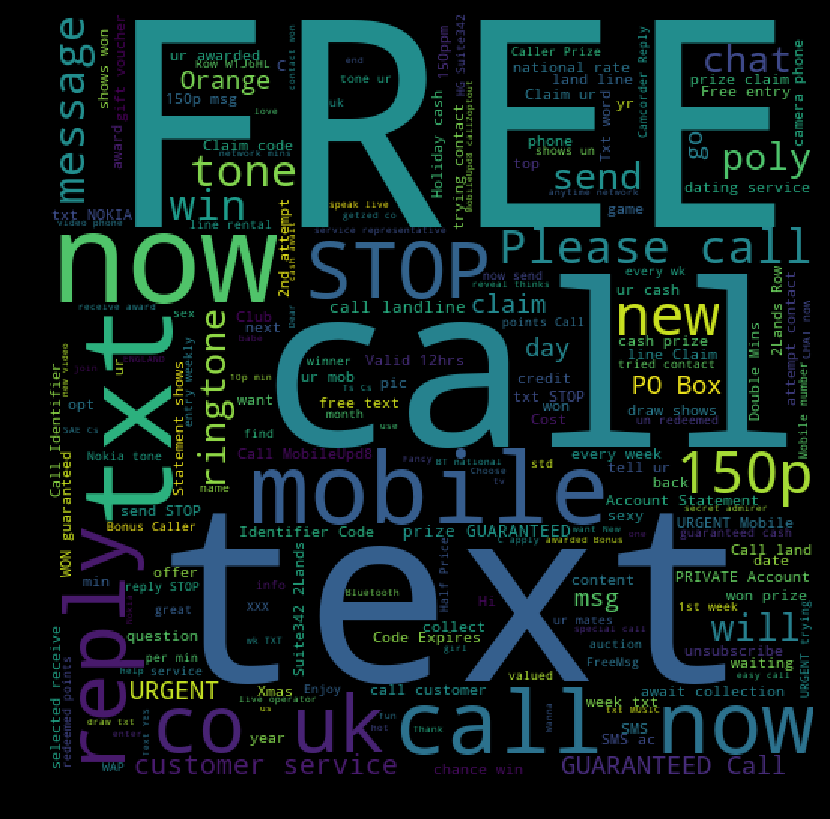

In [19]:
spam_words = ' '.join(list(mails[mails['label'] == 1]['message']))
spam_wc = WordCloud(width = 512,height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

* These messages mostly contain the words like ‘FREE’, ‘call’, ‘text’, ‘ringtone’, ‘prize claim’ etc.

##### Find out most repeated words in ham mails

<a id=section602><a/>

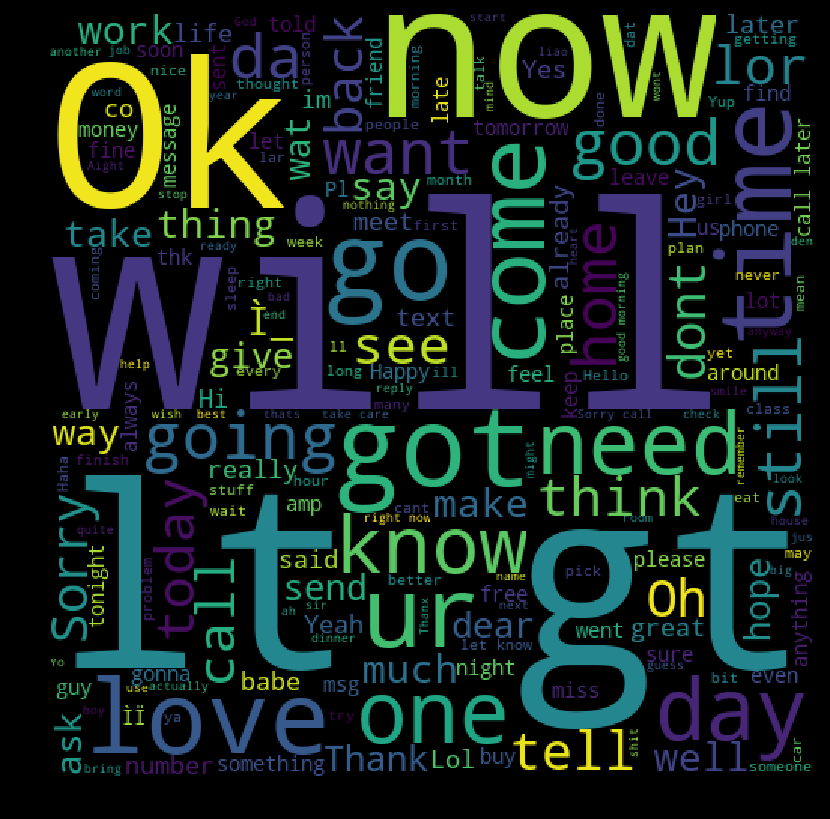

In [20]:
ham_words = ' '.join(list(mails[mails['label'] == 0]['message']))
ham_wc = WordCloud(width = 512,height = 512).generate(ham_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(ham_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [21]:
trainData.head()

,message,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,FreeMsg Hey there darling it's been 3 week's n...,1


In [22]:
trainData['label'].value_counts()

0    3648
1     580
Name: label, dtype: int64

In [23]:
testData.head()

,message,label
0,"Nah I don't think he goes to usf, he lives aro...",0
1,"XXXMobileMovieClub: To use your credit, click ...",1
2,Eh u remember how 2 spell his name... Yes i di...,0
3,Aft i finish my lunch then i go str down lor. ...,0
4,Just forced myself to eat a slice. I'm really ...,0


In [24]:
testData['label'].value_counts()

0    1177
1     167
Name: label, dtype: int64

#### Processing Train and Test data
* Make all the character lowercase, this will help in getting rid of repeated characters.
* Tokenize each message in the dataset for removing punctation in dataset.
* Apply Porter Stemming Algorithm for to replace similar words like go,goes,going, etc.

In [25]:
def process_message(message, lower_case = True, stem = True, stop_words = True, gram = 2):
    if lower_case:
        message = message.lower()
    words = word_tokenize(message)
    words = [w for w in words if len(w) > 2]
    if gram > 1:
        w = []
        for i in range(len(words) - gram + 1):
            w += [' '.join(words[i:i + gram])]
        return w
    if stop_words:
        sw = stopwords.words('english')
        words = [word for word in words if word not in sw]
    if stem:
        stemmer = PorterStemmer()
        words = [stemmer.stem(word) for word in words]   
    return words

In [26]:
class SpamClassifier(object):
    def __init__(self, trainData, method = 'tf-idf'):
        self.mails, self.labels = trainData['message'], trainData['label']
        self.method = method

    def train(self):
        self.calc_TF_and_IDF()
        if self.method == 'tf-idf':
            self.calc_TF_IDF()
        else:
            self.calc_prob()

    def calc_prob(self):
        self.prob_spam = dict()
        self.prob_ham = dict()
        for word in self.tf_spam:
            self.prob_spam[word] = (self.tf_spam[word] + 1) / (self.spam_words + \
                                                                len(list(self.tf_spam.keys())))
        for word in self.tf_ham:
            self.prob_ham[word] = (self.tf_ham[word] + 1) / (self.ham_words + \
                                                                len(list(self.tf_ham.keys())))
        self.prob_spam_mail, self.prob_ham_mail = self.spam_mails / self.total_mails, self.ham_mails / self.total_mails 


    def calc_TF_and_IDF(self):
        noOfMessages = self.mails.shape[0]
        self.spam_mails, self.ham_mails = self.labels.value_counts()[1], self.labels.value_counts()[0]
        self.total_mails = self.spam_mails + self.ham_mails
        self.spam_words = 0
        self.ham_words = 0
        self.tf_spam = dict()
        self.tf_ham = dict()
        self.idf_spam = dict()
        self.idf_ham = dict()
        for i in range(noOfMessages):
            message_processed = process_message(self.mails[i])
            count = list() #To keep track of whether the word has ocured in the message or not.
                           #For IDF
            for word in message_processed:
                if self.labels[i]:
                    self.tf_spam[word] = self.tf_spam.get(word, 0) + 1
                    self.spam_words += 1
                else:
                    self.tf_ham[word] = self.tf_ham.get(word, 0) + 1
                    self.ham_words += 1
                if word not in count:
                    count += [word]
            for word in count:
                if self.labels[i]:
                    self.idf_spam[word] = self.idf_spam.get(word, 0) + 1
                else:
                    self.idf_ham[word] = self.idf_ham.get(word, 0) + 1

    def calc_TF_IDF(self):
        self.prob_spam = dict()
        self.prob_ham = dict()
        self.sum_tf_idf_spam = 0
        self.sum_tf_idf_ham = 0
        for word in self.tf_spam:
            self.prob_spam[word] = (self.tf_spam[word]) * log((self.spam_mails + self.ham_mails) \
                                                          / (self.idf_spam[word] + self.idf_ham.get(word, 0)))
            self.sum_tf_idf_spam += self.prob_spam[word]
        for word in self.tf_spam:
            self.prob_spam[word] = (self.prob_spam[word] + 1) / (self.sum_tf_idf_spam + len(list(self.prob_spam.keys())))
            
        for word in self.tf_ham:
            self.prob_ham[word] = (self.tf_ham[word]) * log((self.spam_mails + self.ham_mails) \
                                                          / (self.idf_spam.get(word, 0) + self.idf_ham[word]))
            self.sum_tf_idf_ham += self.prob_ham[word]
        for word in self.tf_ham:
            self.prob_ham[word] = (self.prob_ham[word] + 1) / (self.sum_tf_idf_ham + len(list(self.prob_ham.keys())))
            
    
        self.prob_spam_mail, self.prob_ham_mail = self.spam_mails / self.total_mails, self.ham_mails / self.total_mails 
                    
    def classify(self, processed_message):
        pSpam, pHam = 0, 0
        for word in processed_message:                
            if word in self.prob_spam:
                pSpam += log(self.prob_spam[word])
            else:
                if self.method == 'tf-idf':
                    pSpam -= log(self.sum_tf_idf_spam + len(list(self.prob_spam.keys())))
                else:
                    pSpam -= log(self.spam_words + len(list(self.prob_spam.keys())))
            if word in self.prob_ham:
                pHam += log(self.prob_ham[word])
            else:
                if self.method == 'tf-idf':
                    pHam -= log(self.sum_tf_idf_ham + len(list(self.prob_ham.keys()))) 
                else:
                    pHam -= log(self.ham_words + len(list(self.prob_ham.keys())))
            pSpam += log(self.prob_spam_mail)
            pHam += log(self.prob_ham_mail)
        return pSpam >= pHam
    
    def predict(self, testData):
        result = dict()
        for (i, message) in enumerate(testData):
            processed_message = process_message(message)
            result[i] = int(self.classify(processed_message))
        return result

In [27]:
def metrics(labels, predictions):
    true_pos, true_neg, false_pos, false_neg = 0, 0, 0, 0
    for i in range(len(labels)):
        true_pos += int(labels[i] == 1 and predictions[i] == 1)
        true_neg += int(labels[i] == 0 and predictions[i] == 0)
        false_pos += int(labels[i] == 0 and predictions[i] == 1)
        false_neg += int(labels[i] == 1 and predictions[i] == 0)
    precision = true_pos / (true_pos + false_pos)
    recall = true_pos / (true_pos + false_neg)
    Fscore = 2 * precision * recall / (precision + recall)
    accuracy = (true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg)

    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F-score: ", Fscore)
    print("Accuracy: ", accuracy)

#### TD-IF method

In [28]:
sc_tf_idf = SpamClassifier(trainData, 'tf-idf')
sc_tf_idf.train()
preds_tf_idf = sc_tf_idf.predict(testData['message'])
metrics(testData['label'], preds_tf_idf)

Precision:  0.8888888888888888
Recall:  0.718562874251497
F-score:  0.794701986754967
Accuracy:  0.9538690476190477


#### Bag of words method

In [29]:
sc_bow = SpamClassifier(trainData, 'bow')
sc_bow.train()
preds_bow = sc_bow.predict(testData['message'])
metrics(testData['label'], preds_bow)

Precision:  0.8852459016393442
Recall:  0.6467065868263473
F-score:  0.7474048442906575
Accuracy:  0.9456845238095238


In [30]:
pm = process_message('I cant pick the phone right now. Please call me latter')
sc_tf_idf.classify(pm)

False

In [31]:
pm = process_message('Congratulations you have been awarded $500 ')
sc_tf_idf.classify(pm)

True

### 7. Conclusion

<a id=conclusion><a/>

With TD - IF method
* Precision:  0.8888888888888888
* Recall:  0.718562874251497
* F-score:  0.794701986754967
* Accuracy:  0.9538690476190477

And with Bag of words

* Precision:  0.8852459016393442
* Recall:  0.6467065868263473
* F-score:  0.7474048442906575
* Accuracy:  0.9456845238095238



** precision, recall, F-score and Accuracy is greater with TD - IF method

In email spam detection, a false positive means that an email that is non-spam (actual negative) has been identified as spam (predicted spam). The email user might lose important emails if the precision is not high for the spam detection model.

In our case precision is more in case of __TD - IF method__